# Exploring majestic million data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

import xavy.explore as xe
import xavy.dataframes as xd

## Loading data

In [25]:
raw_df = pd.read_csv('../data/raw/majestic_million_2023-10-31.csv')

## Exploring raw data

#### Conclusions

* _GlobalRank_ are unique from 1 to 1M and serve as unique identifiers.
* ".com" is the dominant TLD.
* For our purposes (we use UTF-8), IDN domains and TLDs are better (they are biunivocal).
* Domains that were not listed in the previous list have -1 in their _Prev_ columns. These are newcomers (new domains or domains that were not in the top 1M).
* Number of referring subnets is, at most, the number of referring IPs.
* IDN ccTLDs are mainly Russian, then Sweden and Denmark.

### Procedures

#### General

In [3]:
# There are no missing values:
assert len(xe.checkMissing(raw_df, return_df=True)) == 0

In [4]:
xe.mapUnique(raw_df)


GlobalRank: 1000000 unique values.
(sample) 60425,  103628,  114458,  224409,  280390,  371090,  404143,  426261,  439560,  484118,  489169,  549681,  620860,  662238,  685820,  806182,  854131,  877983,  899428,  923009

TldRank: 500818 unique values.
(sample) 2373,  13367,  75405,  97563,  141676,  160139,  192443,  221118,  227710,  259910,  267273,  269189,  280517,  319064,  341259,  354047,  365043,  401858,  485385,  499447

Domain: 1000000 unique values.
(sample) analystprep.com,  andersonville.org,  asap.com,  cooltoad.com,  droplr.com,  ecrjournal.com,  fabriclink.com,  giperlink.by,  jewzc.com,  joelwalden.net,  judiwin66.top,  kinderombudsman.nl,  magicutilities.net,  mediafetcher.com,  merinet.com,  orgion.pics,  sanyurl.com,  tinyme.com,  uservices-ucb.com,  wwf.org.kh

TLD: 845 unique values.
(sample) be,  camera,  charity,  ci,  gay,  info,  irish,  link,  live,  miami,  mm,  nyc,  pictures,  pizza,  place,  re,  report,  sexy,  weber,  zm

RefSubNets: 10791 unique val

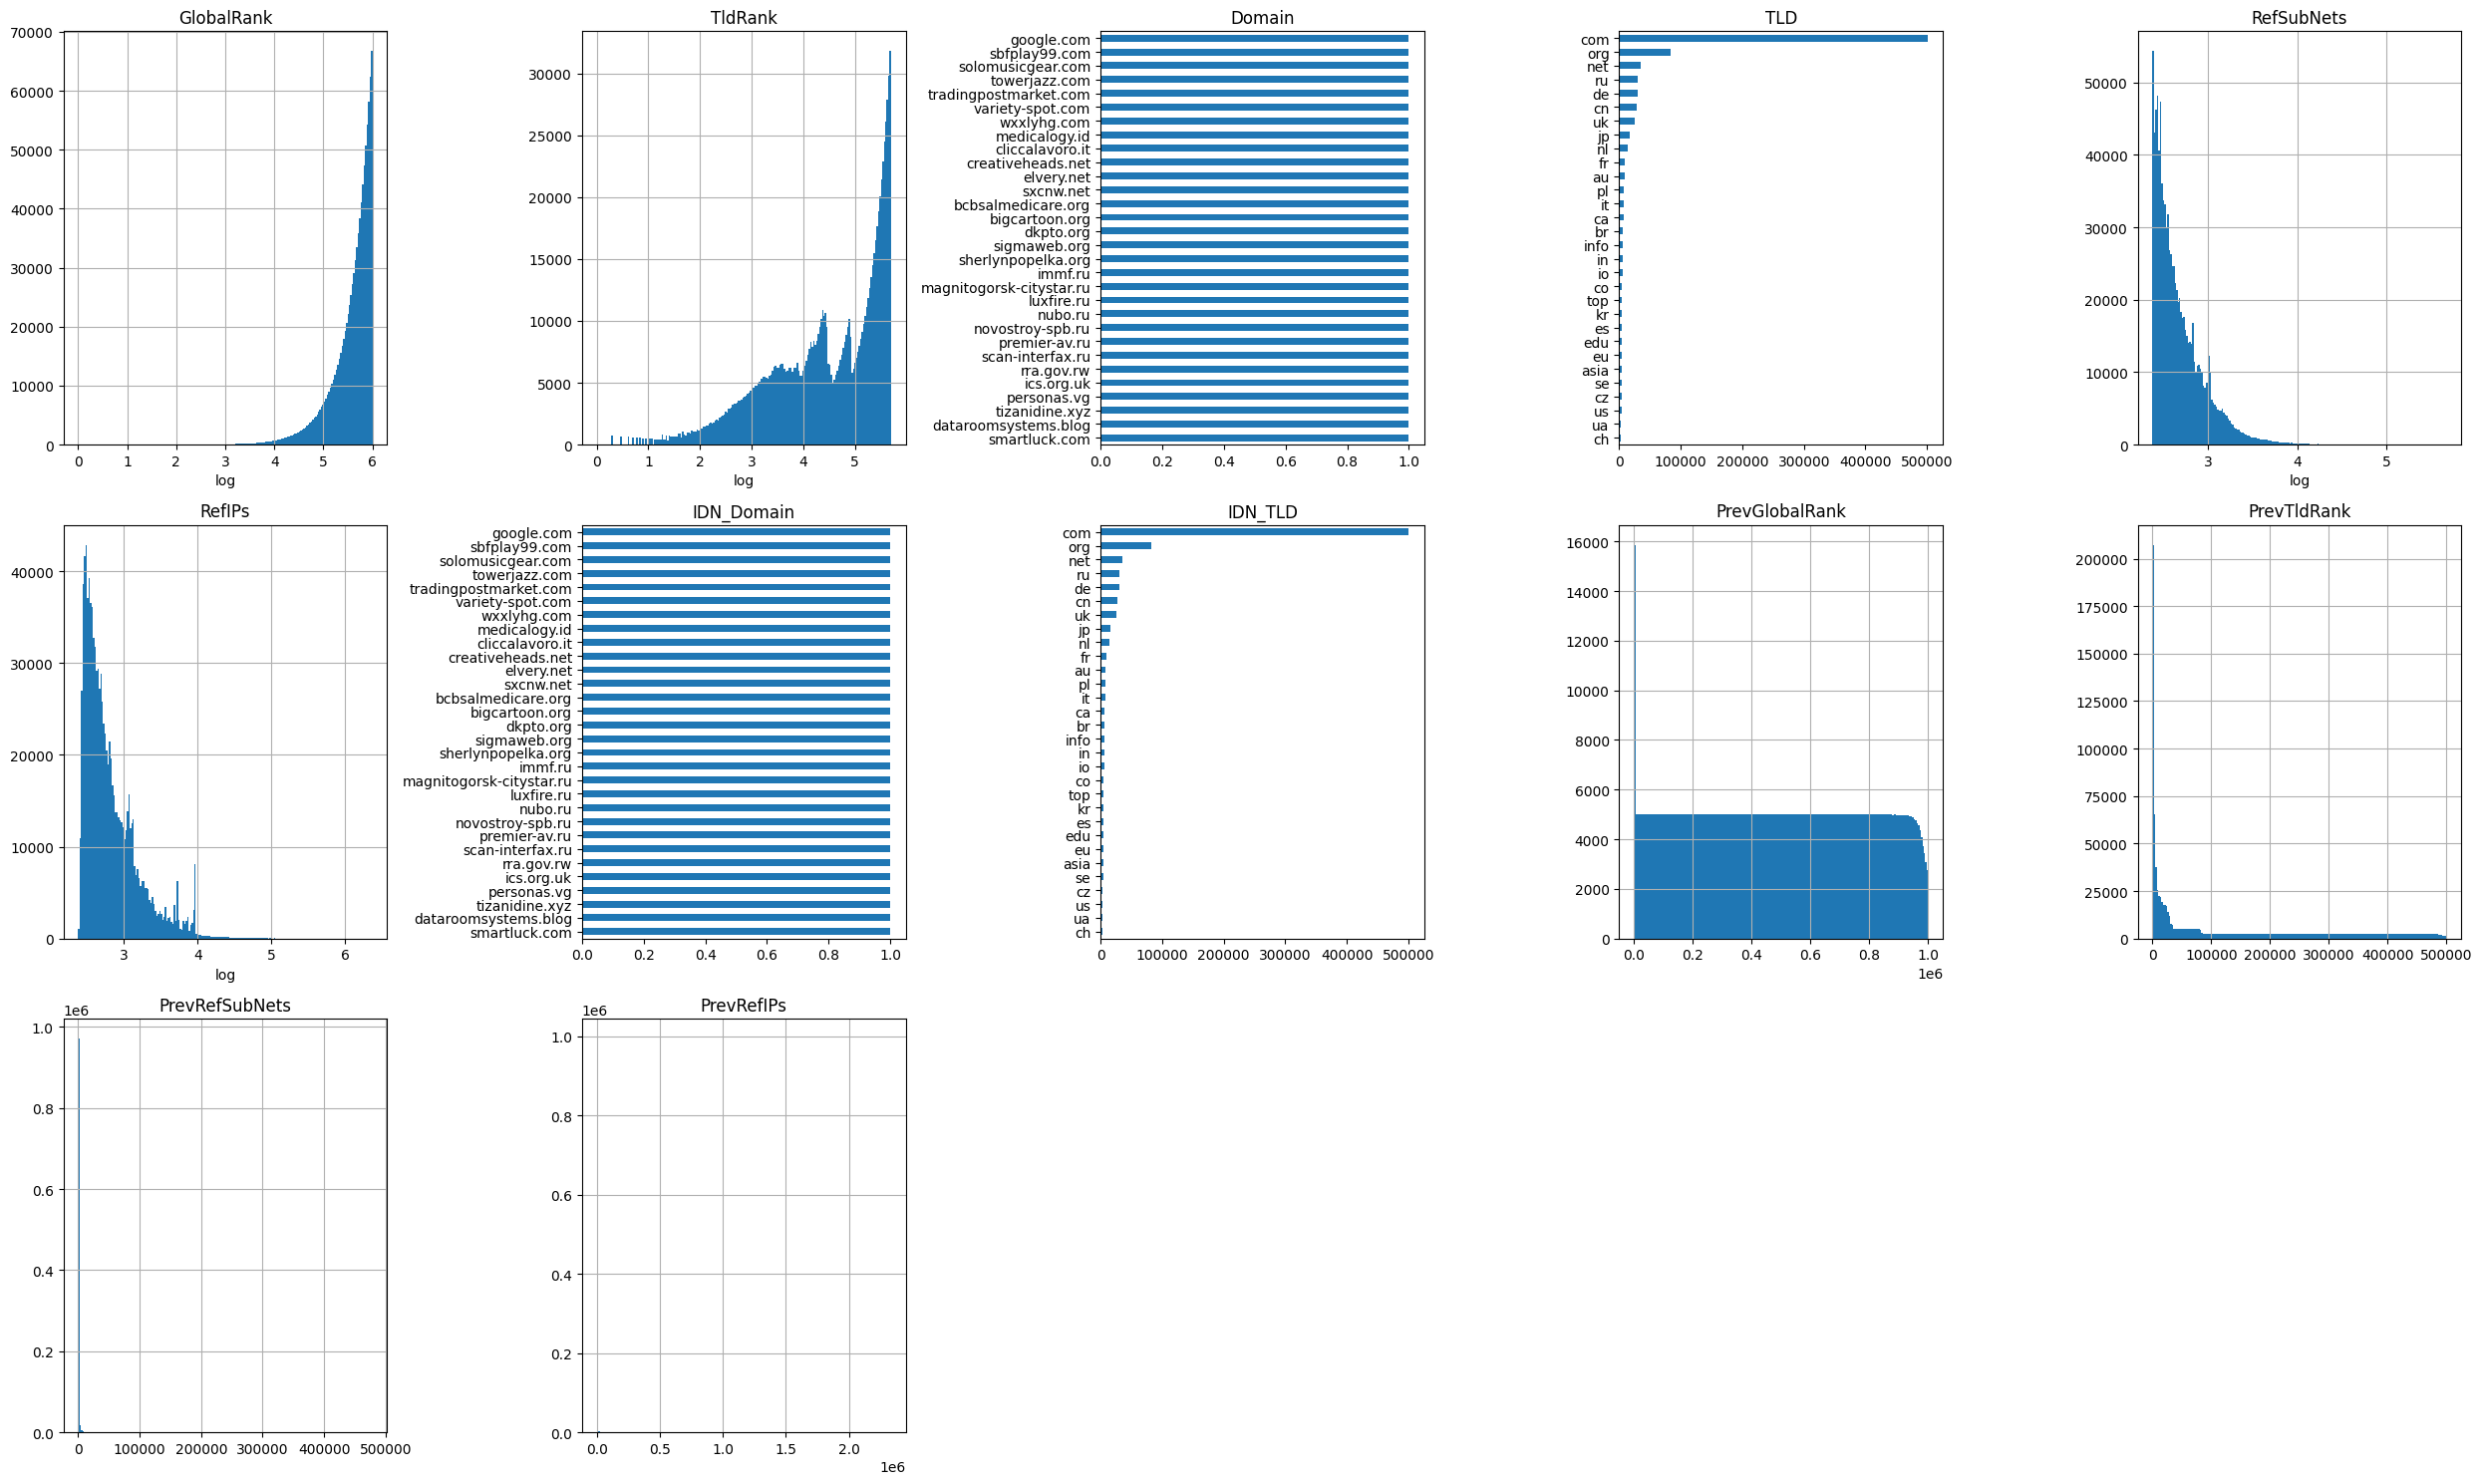

In [5]:
xe.multiple_dist_plots(raw_df)

In [6]:
# All non-string data are integers:
raw_df.dtypes

GlobalRank         int64
TldRank            int64
Domain            object
TLD               object
RefSubNets         int64
RefIPs             int64
IDN_Domain        object
IDN_TLD           object
PrevGlobalRank     int64
PrevTldRank        int64
PrevRefSubNets     int64
PrevRefIPs         int64
dtype: object

#### Rank positions

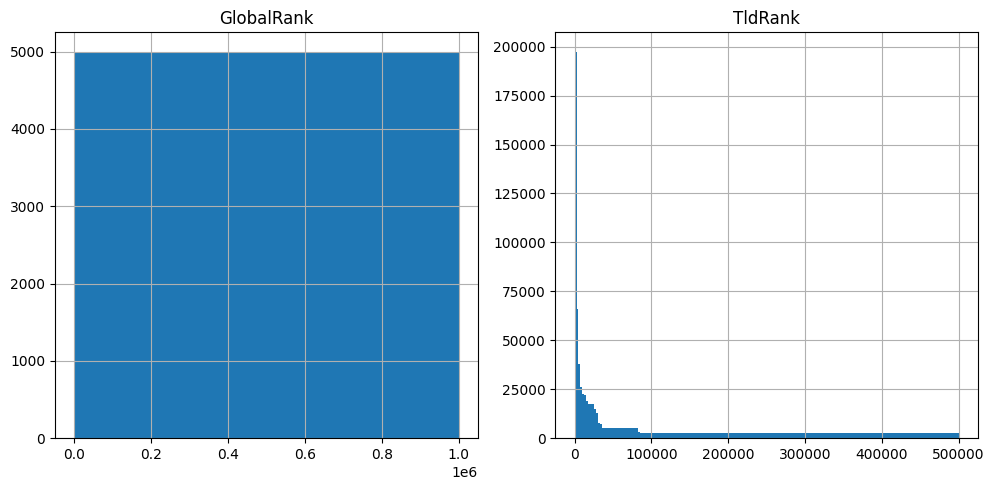

In [7]:
# One occurence of rank position per domain:
xe.multiple_dist_plots(raw_df[['GlobalRank','TldRank']], ['num', 'num'])

In [8]:
# Hypothesis: selection of domains that were not listed in the previous rank:
newcomers_df = raw_df.loc[raw_df['PrevGlobalRank'] < 1].copy()
# Add TLD numbers:
n_tld = raw_df['TLD'].value_counts()
n_tld.name = 'n_TLD'
newcomers_df = newcomers_df.join(n_tld, on='TLD', how='left')
newcomers_df['pc_TLD_rank'] = newcomers_df['TldRank'] / newcomers_df['n_TLD']
newcomers_df['back_TLD_rank'] = newcomers_df['n_TLD'] - newcomers_df['TldRank']

In [9]:
# If _PrevGlobalRank_ < -1, all columns "Prev" are < -1:
assert (newcomers_df[xd.sel_col_by_regex(newcomers_df, '^Prev')] == -1).all(axis=None)

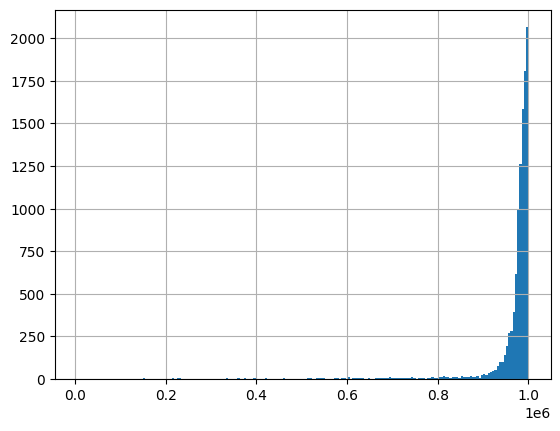

In [10]:
# Newcomers are concentrated at the end of the list, as expected:
newcomers_df['GlobalRank'].hist(bins=200);

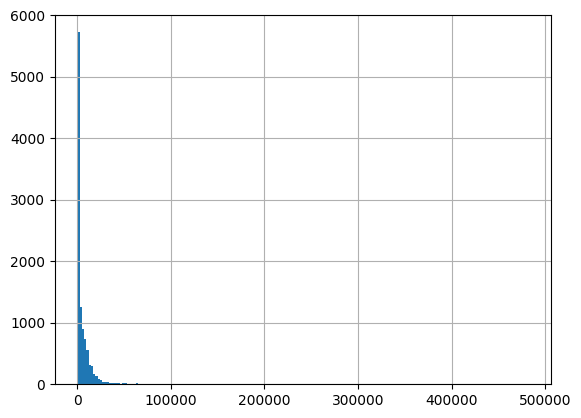

In [11]:
# Newcomers are concentrated at the end of the list, as expected:
newcomers_df['back_TLD_rank'].hist(bins=200);

In [12]:
# Biggest hits among newcomers:
newcomers_df.sort_values('back_TLD_rank', ascending=False).head(10)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs,n_TLD,pc_TLD_rank,back_TLD_rank
36941,36942,18747,canadianpharmacyr.com,com,2037,2696,canadianpharmacyr.com,com,-1,-1,-1,-1,500818,0.037433,482071
62486,62487,31382,appeartv.com,com,1517,1885,appeartv.com,com,-1,-1,-1,-1,500818,0.062661,469436
112323,112324,56228,kooora4live-tv.com,com,1066,1205,kooora4live-tv.com,com,-1,-1,-1,-1,500818,0.112272,444590
131473,131474,70034,megaslotd.com,com,1003,1243,megaslotd.com,com,-1,-1,-1,-1,500818,0.139839,430784
148426,148427,79621,officewinon.com,com,928,7250,officewinon.com,com,-1,-1,-1,-1,500818,0.158982,421197
150702,150703,80769,7rajatogelslot.com,com,918,1168,7rajatogelslot.com,com,-1,-1,-1,-1,500818,0.161274,420049
150864,150865,80860,njbpny.com,com,917,7182,njbpny.com,com,-1,-1,-1,-1,500818,0.161456,419958
185042,185043,98977,crookedfencebrewing.com,com,798,1332,crookedfencebrewing.com,com,-1,-1,-1,-1,500818,0.197631,401841
197720,197721,105879,youtube-mp3-online.com,com,765,871,youtube-mp3-online.com,com,-1,-1,-1,-1,500818,0.211412,394939
201854,201855,108094,pg888th.com,com,753,1000,pg888th.com,com,-1,-1,-1,-1,500818,0.215835,392724


#### Domain names and TLDs

In [13]:
# Domains versions are biunivocal:
assert xe.one2oneQ(raw_df, 'Domain', 'IDN_Domain')

# TLD versions are biunivocal:
assert xe.one2oneQ(raw_df, 'TLD', 'IDN_TLD')

In [14]:
# Domains with IDN domains:
idn_df = raw_df.query('Domain != IDN_Domain')
idn_df.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
11300,11301,1,xn--b1aew.xn--p1ai,xn--p1ai,4375,7588,мвд.рф,рф,11286,1,4381,7597
20481,20482,2,xn--80aesfpebagmfblc0a.xn--p1ai,xn--p1ai,2957,4438,стопкоронавирус.рф,рф,20625,3,2946,4435
22758,22759,3,xn--80abucjiibhv9a.xn--p1ai,xn--p1ai,2760,4156,минобрнауки.рф,рф,22856,4,2754,4144
23681,23682,12073,xn--6j1bj8lmpaq21b.com,com,2688,3794,명문재단.com,com,23790,12128,2682,3798
26890,26891,924,xn--8prw0a.net,net,2478,4233,合唱.net,net,26750,918,2487,4280


/home/hxavier/system/envs/ceweb/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/home/hxavier/system/envs/ceweb/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/home/hxavier/system/envs/ceweb/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  func(*args, **kwargs)
/home/hxavier/system/envs/ceweb/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  func(*args, **kwargs)
/home/hxavier/system/envs/ceweb/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45815 (\N{HANGUL SYLLABLE DAS}) missing from current font.
  func(*args, **kwargs)
/home/hxavier/system/envs/ceweb/lib/pytho

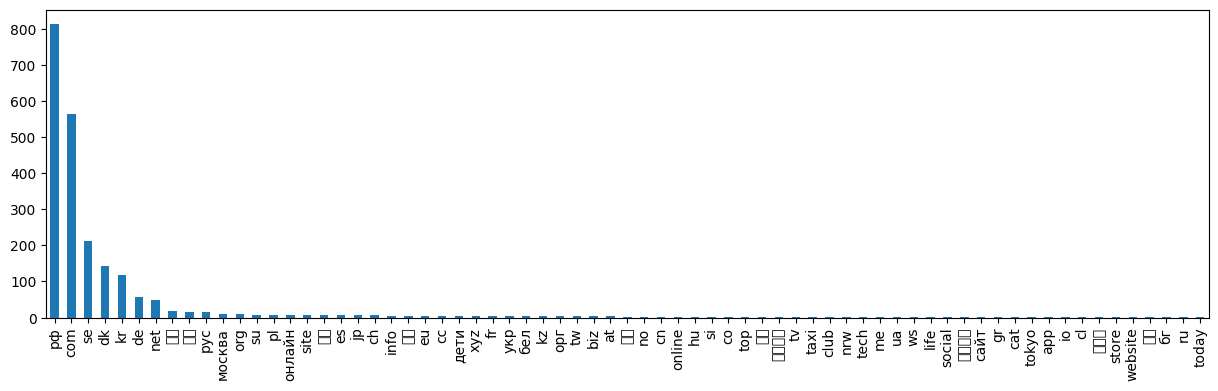

In [15]:
# Most common IDN TLDs:
pl.figure(figsize=(15,4))
idn_df['IDN_TLD'].value_counts().plot(kind='bar');

ccTLDs:

* se = Sweden
* dk = Denmark
* kr = South Korea

#### IPs vs. Subnets

In [16]:
# # Subnets are at most the # IPs:
assert (raw_df['RefSubNets'] <= raw_df['RefIPs']).all()

In [17]:
# Select weird strain:
lognet = np.log10(raw_df['RefSubNets'])
logips = np.log10(raw_df['RefIPs'])
sel_strain = (lognet < np.log10(2.1) + 0.7 * logips) & (lognet > np.log10(1.4) + 0.7 * logips)

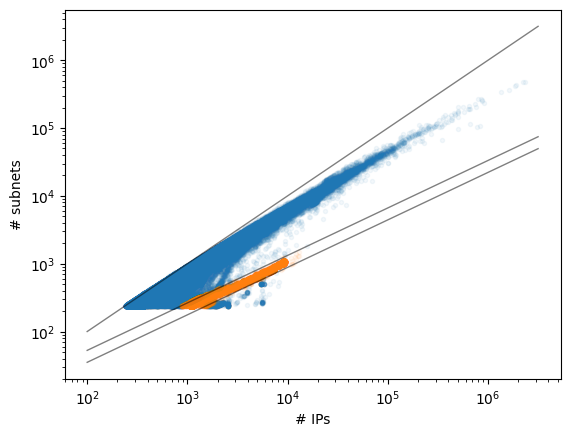

In [18]:
# Data plot:
def_df = raw_df.loc[~sel_strain]
strain_df = raw_df.loc[sel_strain]
pl.scatter(def_df['RefIPs'], def_df['RefSubNets'], alpha=0.05, marker='.')
pl.scatter(strain_df['RefIPs'], strain_df['RefSubNets'], alpha=0.05, marker='.')
pl.yscale('log')
pl.xscale('log')

# Guides:
x = np.logspace(2,6.5, 100)
y = 2.1 * x ** 0.7
w = 1.4 * x ** 0.7
pl.plot(x, x, linewidth=1, color='k', alpha=0.5)
pl.plot(x, y, linewidth=1, color='k', alpha=0.5)
pl.plot(x, w, linewidth=1, color='k', alpha=0.5)

# Format:
pl.ylabel('# subnets')
pl.xlabel('# IPs')

pl.show()

In [19]:
# Strain is made of chinese websites:
strain_df.loc[strain_df['RefIPs'] > 2000].sample(10, random_state=19101)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
177839,177840,95087,zhijianmall.com,com,819,7225,zhijianmall.com,com,180759,96524,809,7167
235576,235577,126602,gongtinglamu.com,com,676,5208,gongtinglamu.com,com,233065,124655,678,5212
136396,136397,72895,blueberry-extract.com,com,981,8381,blueberry-extract.com,com,135590,72302,983,8346
260803,260804,141419,b7l7.com,com,633,4955,b7l7.com,com,268418,145265,619,4879
249911,249912,135365,qzyuze.com,com,652,4900,qzyuze.com,com,250718,135488,649,4809
116931,116932,59562,xetuinapx.com,com,1050,9218,xetuinapx.com,com,116678,58877,1045,9173
119811,119812,61746,kvx3d.com,com,1042,9124,kvx3d.com,com,123395,63984,1026,9039
226024,226025,120369,beixiangli.com,com,691,5535,beixiangli.com,com,230880,122923,680,5417
136862,136863,73163,tzgjmed.com,com,979,8260,tzgjmed.com,com,138293,73822,971,8196
377258,377259,200491,bjzhoucheng888.com,com,483,3276,bjzhoucheng888.com,com,384060,203796,476,3162


In [20]:
# Control:
def_df.loc[def_df['RefIPs'] > 2000].sample(10, random_state=19101)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
27941,27942,23,ng.mil,mil,2418,3414,ng.mil,mil,27734,23,2433,3434
39240,39241,19870,betsafe.com,com,1961,3013,betsafe.com,com,38941,19726,1971,3017
55977,55978,8,viagr.buzz,buzz,1609,2022,viagr.buzz,buzz,56145,9,1608,2018
58285,58286,1437,wochenblatt.de,de,1575,2339,wochenblatt.de,de,58040,1441,1580,2333
65172,65173,32688,inshorts.com,com,1482,2212,inshorts.com,com,65492,32847,1479,2210
41346,41347,20947,clipsyndicate.com,com,1901,2592,clipsyndicate.com,com,40832,20688,1915,2585
48916,48917,24725,dragos.com,com,1730,2338,dragos.com,com,48933,24779,1730,2321
11680,11681,59,lokisdesign.pl,pl,4282,5453,lokisdesign.pl,pl,11688,59,4284,5435
55518,55519,27978,cndns.com,com,1616,2022,cndns.com,com,54961,27688,1626,2029
54633,54634,27531,spinmaster.com,com,1629,2216,spinmaster.com,com,54921,27664,1626,2188


#### Backlinks

In [26]:
from xavy.mltools import PowerLaw

In [32]:
powerlaw = PowerLaw(huber=True, flat_x=True)
powerlaw.fit(raw_df['GlobalRank'], raw_df['RefSubNets'])
xfit = np.logspace(0,6, 100)
yfit = powerlaw.predict(xfit)
powerlaw.exponent_

-0.6970594580970461

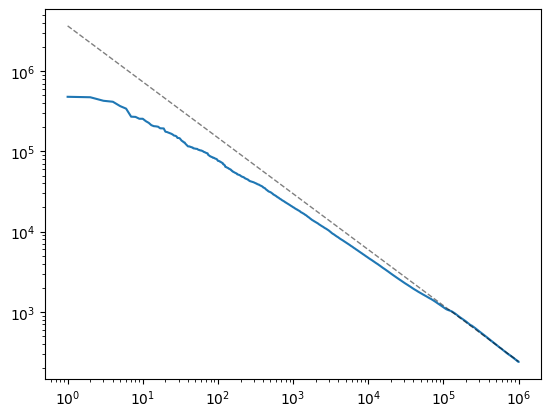

In [30]:
pl.plot(raw_df['GlobalRank'], raw_df['RefSubNets']);
pl.plot(xfit, yfit, color='k', alpha=0.5, linewidth=1, linestyle='--')
pl.yscale('log')
pl.xscale('log')
pl.show()

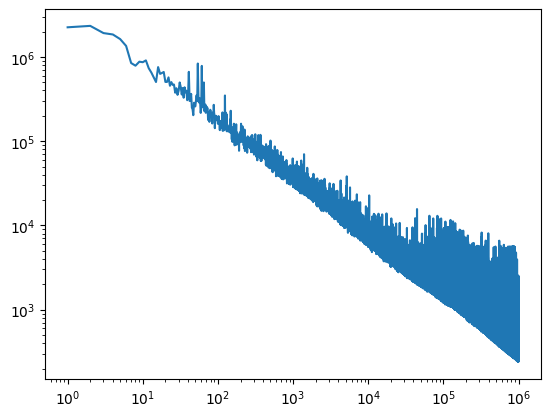

In [71]:
pl.plot(raw_df['GlobalRank'], raw_df['RefIPs']);
pl.yscale('log')
pl.xscale('log')
pl.show()